# Lower Star Time Series

In this module, we will demonstrate the so-called "lower star filtration" or "sublevelset filtration" on a 1D time series, which is a stable way of describing critical points (local mins and maxes) in the time series.  Intuitively, we will compute H0 of the connected components that we get when "rising pools of water" above the graph of the time series.  When a new pool forms at a local min, that is a birth, and when two pool merge together at a local max, that is a death.  In the process, we will show how using nonzero elements along the diagonal of a sparse distance matrix can be used to set vertex birth times.

First, let's do the necessary imports

In [1]:
from ripser import ripser, plot_dgms
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
import time

Now let's set up a time series

Text(0.5,0,'t')

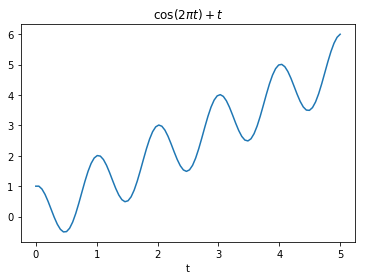

In [2]:
N = 100 #The number of points
t = np.linspace(0, 5, N)
x = np.cos(2*np.pi*t) + t

plt.plot(t, x)
plt.title("$\\cos(2 \pi t) + t$")
plt.xlabel("t")

Now we will perform the sublevelset filtration using a sparse distance matrix.  There is a vertex for each point in the time series, which is born at the height of the point in the time series.  Then, edges connect adjacent points in the time series, and they are added at a height equal to the larger of the two heights of the vertices they connect.

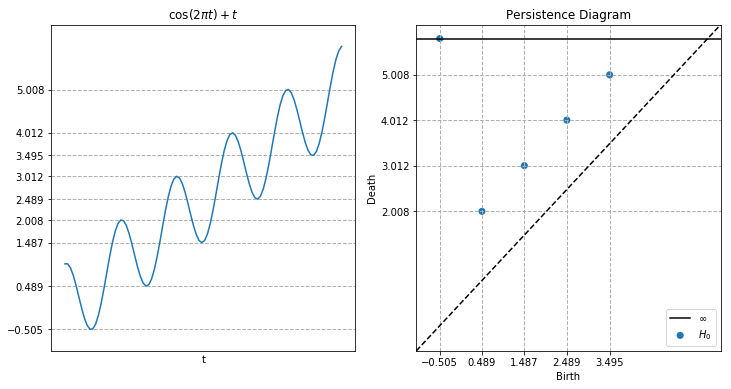

In [3]:
# Add edges between adjacent points in the time series, with the "distance" 
# along the edge equal to the max value of the points it connects
I = np.arange(N-1)
J = np.arange(1, N)
V = np.maximum(x[0:-1], x[1::])
# Add vertex birth times along the diagonal of the distance matrix
I = np.concatenate((I, np.arange(N)))
J = np.concatenate((J, np.arange(N)))
V = np.concatenate((V, x))
#Create the sparse distance matrix
D = sparse.coo_matrix((V, (I, J)), shape=(N, N)).tocsr()
dgm0 = ripser(D, maxdim=0, distance_matrix=True)['dgms'][0]
dgm0 = dgm0[dgm0[:, 1]-dgm0[:, 0] > 1e-3, :]
allgrid = np.unique(dgm0.flatten())
allgrid = allgrid[allgrid < np.inf]
xs = np.unique(dgm0[:, 0])
ys = np.unique(dgm0[:, 1])
ys = ys[ys < np.inf]

#Plot the time series and the persistence diagram
plt.figure(figsize=(12, 6))
ylims = [-1, 6.5]
plt.subplot(121)
plt.plot(t, x)
ax = plt.gca()
ax.set_yticks(allgrid)
ax.set_xticks([])
plt.ylim(ylims)
plt.grid(linewidth=1, linestyle='--')
plt.title("$\\cos(2 \pi t) + t$")
plt.xlabel("t")

plt.subplot(122)
ax = plt.gca()
ax.set_yticks(ys)
ax.set_xticks(xs)
plt.ylim(ylims)
plt.grid(linewidth=1, linestyle='--')
plot_dgms(dgm0, size=50)
plt.title("Persistence Diagram")


plt.show()

Notice how the birth times correspond to local mins and the death times correspond to local maxes